In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("factbook.db")

q1 = "SELECT * FROM sqlite_master WHERE type='table';"
conn.execute(q1).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [2]:
q2= "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q2, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [3]:
q3 = "select * from facts limit 5"
pd.read_sql_query(q3, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [4]:
q_population = '''
select MIN(population) as min_pop, MAX(population) as max_pop,
MIN(population_growth) as min_growth, MAX(population_growth) as max_growth 
from facts
'''

pd.read_sql_query(q_population, conn)

,min_pop,max_pop,min_growth,max_growth
0,0,7256490011,0.0,4.02


In [5]:
# Antarctica is no population.

q_minPop = '''
select * from facts
where population = (select MIN(population) from facts)
'''

pd.read_sql_query(q_minPop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [6]:
# World with a population of 7256490011.

q_maxPop = '''
select * from facts
where population = (select MAX(population) from facts)
'''

pd.read_sql_query(q_maxPop, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


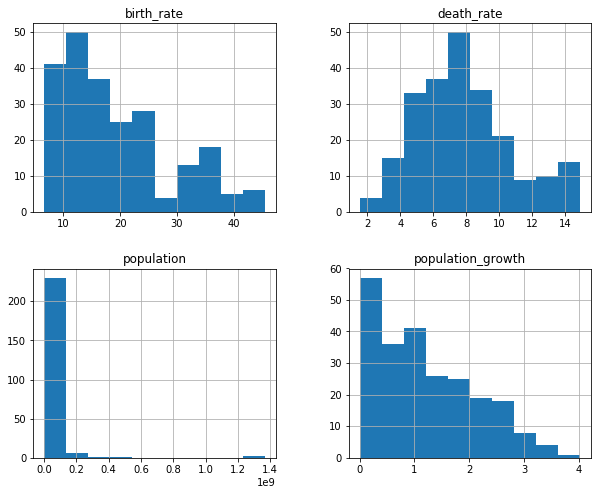

In [8]:
q_nonOutlierPop = '''
select population, population_growth, birth_rate, death_rate from facts
where population != (select MIN(population) from facts)
and population != (select MAX(population) from facts)
'''

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1)

table = pd.read_sql_query(q_nonOutlierPop, conn)
table.hist(ax=ax)
plt.show()

In [9]:
# Macau have the highest population density.

q_density = '''
select name, round(cast(population as float) / area_land, 2) as density
from facts
where density > 1000
order by density DESC
'''

pd.read_sql_query(q_density, conn)

,name,density
0,Macau,21168.96
1,Monaco,15267.50
2,Singapore,8259.78
3,Hong Kong,6655.27
4,Gaza Strip,5191.82
5,Gibraltar,4876.33
6,Bahrain,1771.86
7,Maldives,1319.64
8,Malta,1310.02
9,Bermuda,1299.93


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EFB50E5978>]], dtype=object)

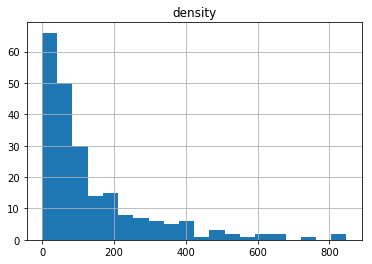

In [10]:
# Generate a histogram of population densities.
# remove Outlier densities (top 12)

q_density = '''
select name, round(cast(population as float) / area_land, 2) as density
from facts
where density < 1000
'''

pd.read_sql_query(q_density, conn).hist(bins=20)

In [11]:
# Virgin Islands have the highest ratios of water to land.

q_ratioWater = '''
select name, round(cast(area_water as float) / area, 4) as "ratios of water"
from facts
order by "ratios of water" DESC
limit 10
'''

pd.read_sql_query(q_ratioWater, conn)

,name,ratios of water
0,British Indian Ocean Territory,0.9989
1,Virgin Islands,0.8188
2,Puerto Rico,0.3568
3,"Bahamas, The",0.2788
4,Guinea-Bissau,0.2216
5,Malawi,0.2060
6,Netherlands,0.1841
7,Uganda,0.1823
8,Eritrea,0.1412
9,Liberia,0.1351


In [13]:
# Virgin Islands have more water than land.

q_moreWater = '''
select * from facts
where cast(area_water as float) / area > 0.5
'''

pd.read_sql_query(q_moreWater, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,228,io,British Indian Ocean Territory,54400,60,54340,NaN,NaN,NaN,NaN,NaN,2015-11-01 13:37:35.922896,2015-11-01 13:37:35.922896
1,247,vq,Virgin Islands,1910,346,1564,103574.0,0.59,10.31,8.54,7.67,2015-11-01 13:38:38.270075,2015-11-01 13:38:38.270075
